In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'

import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from LoadMultiFiles import  LoadMultiFiles

 13%|█▎        | 660/5000 [00:06<00:40, 107.59it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:397: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
  0%|          | 0/5000 [00:00<?, ?it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:397: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
  3%|▎         | 168/5000 [00:00<00:23, 206.33it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:413: RuntimeWarning: invalid value encountered in float_scalars
  dE_dx_average = np.sum(v_dE_dx*v_dE_quench)/sum_dE_quench
100%|██████████| 5000/5000 [00:24<00:00, 201.53it/s]


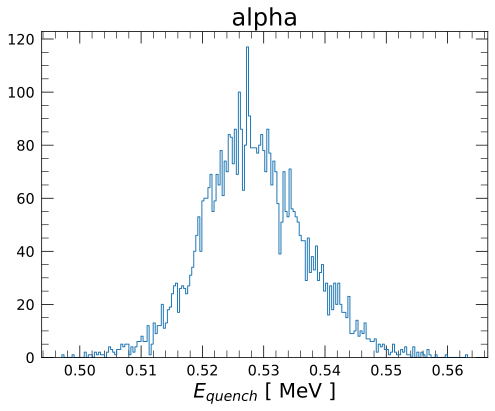

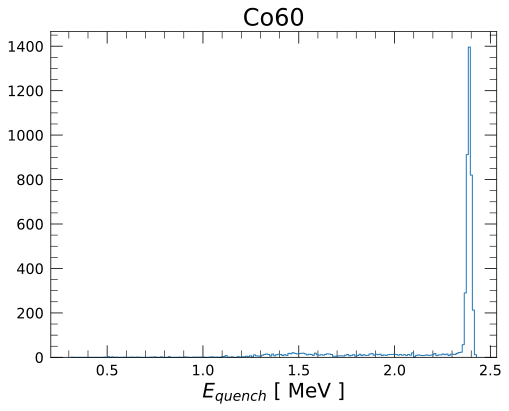

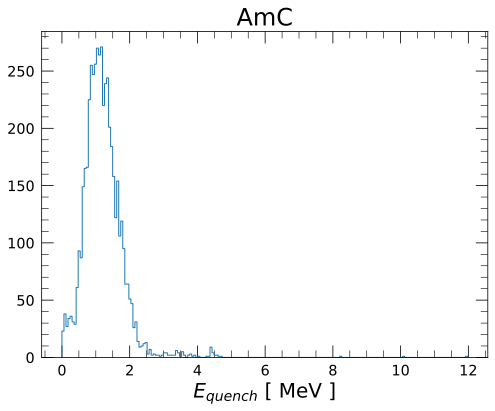

In [2]:
from importlib import reload
import PlotTrackOfProcess
reload(PlotTrackOfProcess)
from PlotTrackOfProcess import PlotTrackOfProcess
track_tool = PlotTrackOfProcess()

import tqdm

v_particles = ["alpha", "Co60", "AmC"]
# v_particles = ["alpha", "gamma", "neutron"]
v_particles_subdir = ["5.15", "", ""]
# v_name_files = ["user-detsim-100.root"]*2+["user-detsim-103.root"]
v_name_files = ["user-detsim-100.root"]*2+["user-detsim-203_DayaBay.root"]
# v_particles = [ "neutron"]
# v_particles_subdir = [""]
# v_name_files = ["user-detsim-103.root"]
template_path = \
    "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Sim_DSNB/timing_constant_study/" \
    "{}/0_0_0/{}/detsim/user-root/{}"
check_result_with_track = False

# template_path = \
# "/afs/ihep.ac.cn/users/l/luoxj/DSNB_component_fitting/timing_constant_study/{}/{}"
dir_v_dE_dx_average = {}
dir_v_dE_dx_average_with_quench = {}
dir_v_equen = {}
for i,particle in enumerate(v_particles):
    name_file_full_path = template_path.format(particle, v_particles_subdir[i],
                            v_name_files[i])
    # name_file_full_path = template_path.format(particle, v_name_files[i])
    track_tool.SetDataset(name_file_full_path)
    index_evtID_of_equen = track_tool.GetEvtIDOfDepTree()
    entries = track_tool.GetTotalEntries()
    v_dE_dx = []
    v_dE_dx_with_quench = []
    v_equen = track_tool.PlotEquen(title=particle,
                                   name_fig_save=f"./figure/Equen_{particle}.png",filter_n_capture=(particle=="neutron" or particle=="AmC"), bins=200)
    # for j_entry in tqdm.trange(entries)[:1000]:
    n_figure_track = 0
    for j_entry in tqdm.trange(entries):
        # track_tool.PlotTrackWithEntrySource(j_entry,print_track_info=True)
        # v_dE_dx_one_event, v_dE_one_event = track_tool.Get_dE_dx_ByLoading(entry_source=j_entry)
        # print(particle,v_dE_one_event)
        # track_tool.PlotDiffParticle_dE_dx(j_entry,print_info=True)

        # if particle=="neutron":

        dE_dx_average = track_tool.Get_Average_dE_dx(j_entry)
        dE_dx_average_with_quench = track_tool.Get_Average_dE_dx(j_entry,times_quench_factor=True)
        v_dE_dx.append(dE_dx_average)
        v_dE_dx_with_quench.append(dE_dx_average_with_quench)

        if n_figure_track>10 and check_result_with_track:
            break
    dir_v_dE_dx_average[particle] = np.array(v_dE_dx)[index_evtID_of_equen]
    dir_v_equen[particle] = v_equen
    dir_v_dE_dx_average_with_quench[particle] = np.array(v_dE_dx_with_quench)[index_evtID_of_equen]


In [3]:
# Study quench energy 4-5 MeV pump

# print(v_equen)

# index_anormal_pump = np.where( (v_equen<6)&(v_equen>4))[0]
# index_normal_peak = np.where((v_equen<2)&(v_equen>1))[0]
# for i in index_anormal_pump[:3]:
#     track_tool.PlotTrackWithEntrySource(i,debug=True,print_track_info=True)
# print("####################################################normal")
# for i in index_normal_peak[:3]:
#     track_tool.PlotTrackWithEntrySource(i,debug=True,print_track_info=True)

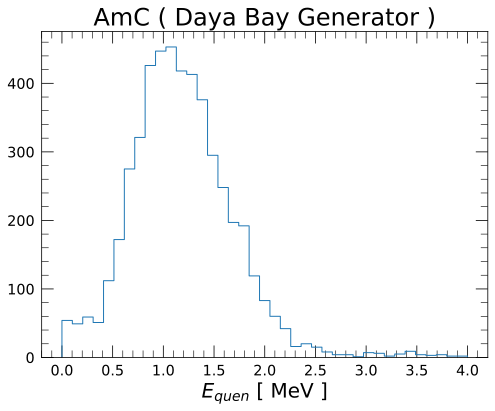

In [4]:
plt.hist(dir_v_equen["AmC"], histtype="step",bins=np.linspace(0,4, 40))
plt.xlabel("$E_{quen}$ [ MeV ]")
plt.title("AmC ( Daya Bay Generator )")
plt.savefig("./figure/AmC_Equen.png")

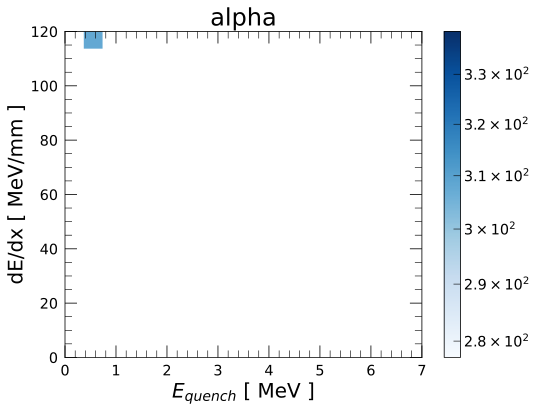

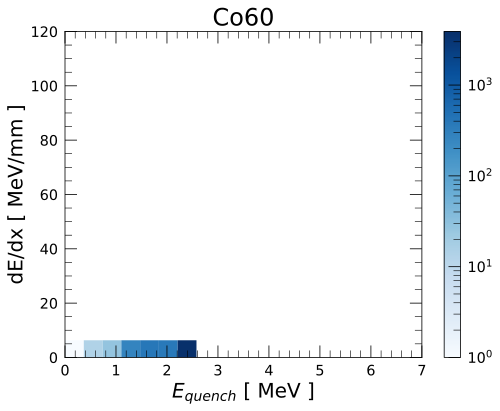

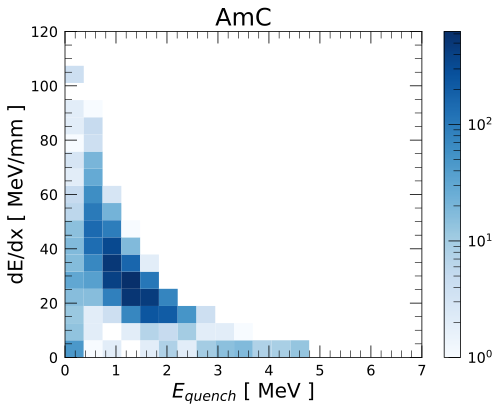

In [5]:
from matplotlib.colors import LogNorm
for particle in dir_v_dE_dx_average.keys():
# for particle in ["neutron"]:
    plt.figure()
    plt.hist2d(dir_v_equen[particle][:4999], dir_v_dE_dx_average_with_quench[particle][:4999],cmap="Blues", bins=(np.linspace(0,7,20),np.linspace(0,120,20)),
               norm=LogNorm())
    plt.colorbar()
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.ylabel("dE/dx [ MeV/mm ]")
    plt.title(particle)
    plt.savefig(f"./figure/{particle}_Eqeun_dE_dx.png")


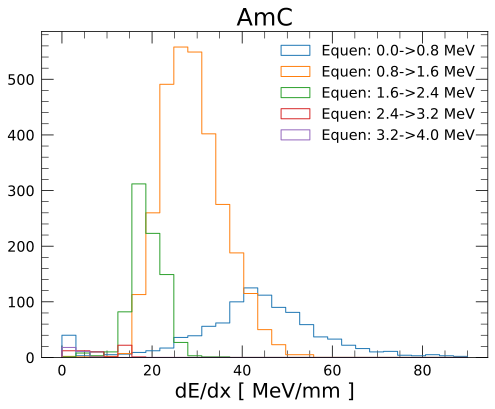

In [6]:
bins_equen_AmC = np.linspace(0, 4, 6)
for i in range(len(bins_equen_AmC)-1):
    index_equen_cut_AmC = ((dir_v_equen["AmC"]>bins_equen_AmC[i])& (dir_v_equen["AmC"]<bins_equen_AmC[i+1]))
    plt.hist(np.array(dir_v_dE_dx_average_with_quench["AmC"])[index_equen_cut_AmC],
             label=f"Equen: {bins_equen_AmC[i]:.1f}->{bins_equen_AmC[i+1]:.1f} MeV",histtype="step", bins=np.linspace(0,90,30))
plt.legend()
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title("AmC")
plt.savefig("./figure/projection_AmC_dE_dx.png")


In [7]:
# from importlib import reload
# import PlotTrackOfProcess
# reload(PlotTrackOfProcess)
# from PlotTrackOfProcess import PlotTrackOfProcess
# track_tool = PlotTrackOfProcess()
# name_file_full_path = template_path.format(particle, v_particles_subdir[-1],
#                                            v_name_files[-1])
# track_tool.SetDataset(name_file_full_path)
#
# dir_v_dE_dx_average_with_quench["AmC"] = np.array(dir_v_dE_dx_average_with_quench["AmC"])
# bins_equen_AmC = [0.8, 1.6]
# i_particle = [2]
# for i in range(len(bins_equen_AmC)-1):
#     index_equen_cut_AmC = ((dir_v_equen["AmC"]>bins_equen_AmC[i])& (dir_v_equen["AmC"]<bins_equen_AmC[i+1]))
#     index_low_dE_dx = ( (dir_v_dE_dx_average_with_quench["AmC"]< 2.5) & (index_equen_cut_AmC) )
#     # plt.hist(dir_v_dE_dx_average_with_quench["AmC"][index_low_dE_dx],histtype="step")
#     num_index_low_dE_dx = np.where(index_low_dE_dx==True)[0]
#     print(num_index_low_dE_dx)
#     print(track_tool.name_file_last)
#     for i_event in num_index_low_dE_dx:
#         track_tool.PlotTrackWithEntrySource(i_event, show_process_name=True,debug=True, print_track_info=True)
#         track_tool.Print_dE_dx_Contribution(i_event)



{'alpha': 143.06342, 'Co60': 0.7631467, 'AmC': 51.167603}


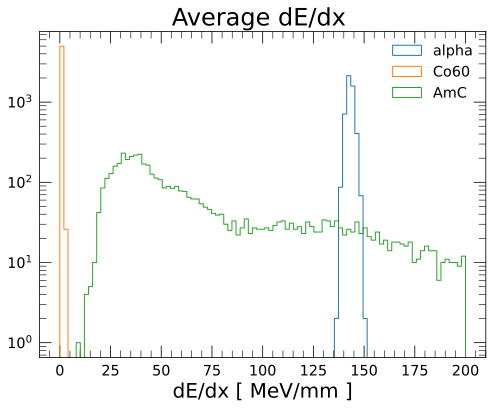

In [8]:
dir_mean_dE_dx = {}
for particle in dir_v_dE_dx_average.keys():
    plt.hist(dir_v_dE_dx_average[particle], histtype="step", label=particle, bins=np.linspace(0,200,100))
    dir_mean_dE_dx[particle] = np.median(dir_v_dE_dx_average[particle])
plt.legend()
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title("Average dE/dx ")
plt.savefig(f"./figure/diff_particle_dE_dx.png")
plt.semilogy()
plt.savefig(f"./figure/diff_particle_dE_dx_with_log.png")
print(dir_mean_dE_dx)


{'alpha': 122.773224, 'Co60': 0.6747912, 'AmC': 29.574236}


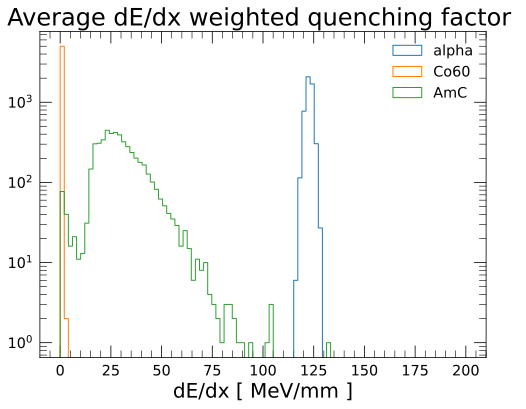

In [9]:
dir_mean_dE_dx_with_quench = {}
for particle in dir_v_dE_dx_average_with_quench.keys():
    plt.hist(dir_v_dE_dx_average_with_quench[particle], histtype="step", label=particle, bins=np.linspace(0,200,100))
    dir_mean_dE_dx_with_quench[particle] = np.nanmean(dir_v_dE_dx_average_with_quench[particle])
plt.legend()
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title("Average dE/dx weighted quenching factor ")
plt.savefig(f"./figure/diff_particle_dE_dx_with_quench.png")
plt.semilogy()
plt.savefig(f"./figure/diff_particle_dE_dx_with_quench_with_log.png")
print(dir_mean_dE_dx_with_quench)

In [10]:

# v_particles = [ "AmC"]
# v_particles_subdir = [""]
# v_name_files = ["user-detsim-102.root"]
#
# for i,particle in enumerate(v_particles):
#     name_file_full_path = template_path.format(particle, v_particles_subdir[i],
#                             v_name_files[i])
#     track_tool.SetDataset(name_file_full_path)
#     entries = track_tool.GetTotalEntries()
#     v_dE_dx = []
#     for j_entry in range(entries)[:5]:
        # track_tool.PlotDiffParticle_dE_dx(j_entry,print_info=True)

In [11]:
# test different step size
# name_file_with10 = "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Sim_DSNB/timing_constant_study/alpha_0_0_0/5.15/detsim/user-root/user-detsim-101.root"
# name_file_with50 = template_path.format("alpha", "5.15", "user-detsim-100.root")
# for name_file in [name_file_with10, name_file_with50]:
#     track_tool.SetDataset(name_file)
#     entries = track_tool.GetTotalEntries()
#     for j_entry in range(entries)[:1]:
        # v_dE_dx_one_event, v_dE_one_event = track_tool.Get_dE_dx_ByLoading(entry_source=j_entry)
        # print(v_dE_dx_one_event)
        # print(v_dE_one_event)
        # plt.hist(v_dE_dx_one_event, histtype="step")

{'Co60': [0.799, 4.93, 0.171, 20.6, 0.03, 190], 'AmC': [0.65, 4.93, 0.231, 34, 0.11900000000000001, 220], 'alpha': [0.65, 4.93, 0.228, 35, 0.122, 220]}


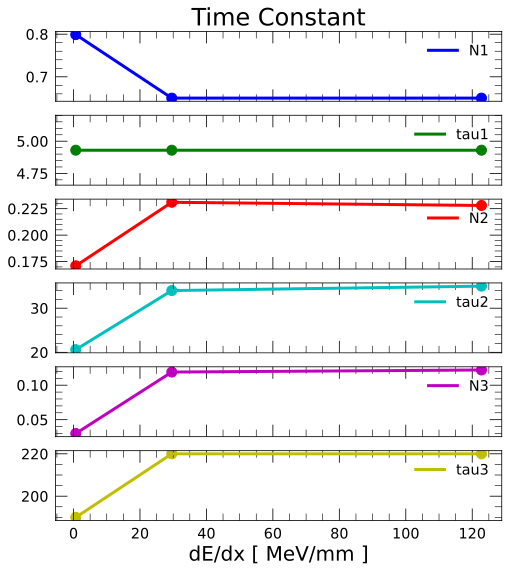

In [12]:
# Plot timing constant with different dE_dx
v_name_timing_constant = ["N1", "tau1", "N2", "tau2", "N3", "tau3"]
dir_v_timing_constant = {}
# dir_v_timing_constant["gamma"] = [79.9,4.93,17.1,20.6,3,190]
# dir_v_timing_constant["neutron"] = [65,4.93,23.1,34,11.9,220]
dir_v_timing_constant["Co60"] = [79.9,4.93,17.1,20.6,3,190]
dir_v_timing_constant["AmC"] = [65,4.93,23.1,34,11.9,220]
dir_v_timing_constant["alpha"] = [65,4.93,22.8,35,12.2,220]

# Normalization of parameters N*
for particle in dir_v_timing_constant.keys():
    for i in range(len(v_name_timing_constant)):
        if "N" in v_name_timing_constant[i]:
            dir_v_timing_constant[particle][i] = dir_v_timing_constant[particle][i]*0.01
print(dir_v_timing_constant)


n_figures = len(v_name_timing_constant)
fig,axs = plt.subplots(6,1,sharex="col",figsize=(8,9))
colors = ["b","g","r","c","m","y","k","w"]
dir_v_x = {}
dir_v_y = {}
for i_constant in range(6):
    # plt.figure()
    # ax = plt.subplot(n_figures*100+10+1+i_constant)
    v_x = []
    v_y = []
    for particle in dir_v_timing_constant.keys():
        v_x.append(dir_mean_dE_dx_with_quench[particle])
        v_y.append(dir_v_timing_constant[particle][i_constant])
    # plt.plot(v_x,v_y)
    axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=v_name_timing_constant[i_constant])
    axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    dir_v_x[v_name_timing_constant[i_constant]] = v_x
    dir_v_y[v_name_timing_constant[i_constant]] = v_y
    # ax.title(v_name_timing_constant[i_constant])
    axs[i_constant].legend()
plt.xlabel("dE/dx [ MeV/mm ]")
axs[0].set_title("Time Constant")
plt.savefig("./figure/time_constant_with_dE_dx.png")



In [13]:

dir_into_file = {}
for i,name_constant in enumerate(dir_v_timing_constant.keys()):
    # v_line = []
    # v_line
    v_N = np.array(dir_v_timing_constant[name_constant][::2], dtype=str)
    v_tau = np.array(dir_v_timing_constant[name_constant][1::2],dtype=str)
    v_unit = np.array(["*ns"]*3)
    dir_into_file[name_constant] = np.vstack((v_tau,v_unit,v_N)).T
print(dir_into_file)
for particle in dir_into_file.keys():
    if particle == "AmC":
        particle_txt = "Neutron"
    elif particle=="Co60":
        particle_txt = "Gamma"
    elif particle == "alpha":
        particle_txt = "Alpha"
    np.savetxt(f"/afs/ihep.ac.cn/users/l/luoxj/change_scintillation/three_component_J21/time_constant_three_components/DetSim/Material/LS/{particle_txt}CONSTANT",
               dir_into_file[particle],"%s",delimiter="\t")





{'Co60': array([['4.93', '*ns', '0.799'],
       ['20.6', '*ns', '0.171'],
       ['190', '*ns', '0.03']], dtype='<U5'), 'AmC': array([['4.93', '*ns', '0.65'],
       ['34', '*ns', '0.231'],
       ['220', '*ns', '0.11900000000000001']], dtype='<U19'), 'alpha': array([['4.93', '*ns', '0.65'],
       ['35', '*ns', '0.228'],
       ['220', '*ns', '0.122']], dtype='<U5')}


In [14]:
v_constant_into_file_added_ns = {}
# for i_constant in range(len(v_name_timing_constant)):
for name_constant in v_name_timing_constant:
    v_constant_into_file = np.array([dir_v_x[name_constant],
                dir_v_y[name_constant]], dtype=str).T
    for i in range(len(v_constant_into_file)):
        if i == 0:
            v_constant_into_file_added_ns[name_constant] = []
        v_constant_into_file_added_ns[name_constant].append(
                np.insert(v_constant_into_file[i],1, '*MeV/mm'))
print("constants written into file:\t",v_constant_into_file_added_ns)
if False:
    for name_constant in v_name_timing_constant:
        np.savetxt(f"/afs/ihep.ac.cn/users/l/luoxj/scratchfs_juno_500G/J21v1r0-Pre2/data/Simulation/DetSim/Material/LS/{name_constant}CONSTANT",
               v_constant_into_file_added_ns[name_constant],"%s",delimiter="\t")

constants written into file:	 {'N1': [array(['0.6747912', '*MeV/mm', '0.799'], dtype='<U10'), array(['29.574236', '*MeV/mm', '0.65'], dtype='<U10'), array(['122.773224', '*MeV/mm', '0.65'], dtype='<U10')], 'tau1': [array(['0.6747912', '*MeV/mm', '4.93'], dtype='<U10'), array(['29.574236', '*MeV/mm', '4.93'], dtype='<U10'), array(['122.773224', '*MeV/mm', '4.93'], dtype='<U10')], 'N2': [array(['0.6747912', '*MeV/mm', '0.171'], dtype='<U10'), array(['29.574236', '*MeV/mm', '0.231'], dtype='<U10'), array(['122.773224', '*MeV/mm', '0.228'], dtype='<U10')], 'tau2': [array(['0.6747912', '*MeV/mm', '20.6'], dtype='<U10'), array(['29.574236', '*MeV/mm', '34'], dtype='<U10'), array(['122.773224', '*MeV/mm', '35'], dtype='<U10')], 'N3': [array(['0.6747912', '*MeV/mm', '0.03'], dtype='<U19'), array(['29.574236', '*MeV/mm', '0.11900000000000001'], dtype='<U19'), array(['122.773224', '*MeV/mm', '0.122'], dtype='<U19')], 'tau3': [array(['0.6747912', '*MeV/mm', '190'], dtype='<U10'), array(['29.57423

N_sum:	 1.0
N_sum:	 1.0
N_sum:	 1.0
N_sum:	 1.0
N_sum:	 1.0


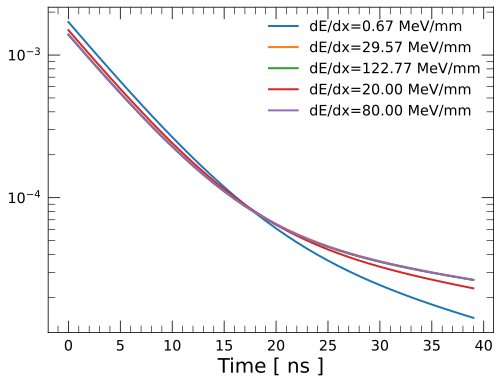

In [15]:
def f_photon_emission_time(dir_time_constant:dir, v_t:np.ndarray):
    v_y = np.zeros(len(v_t))
    N_sum = 0
    for i in range(1,int(len(dir_time_constant.keys())/2)+1):
        N_sum += dir_time_constant[f"N{i}"]
    print("N_sum:\t",N_sum)
    for i in range(1,int(len(dir_time_constant.keys())/2)+1):
        N = dir_time_constant[f"N{i}"]/100
        tau = dir_time_constant[f"tau{i}"]
        v_y += (N/tau)*np.exp(-v_t/tau)
    return v_y

from scipy.interpolate import interp1d
dir_interp_f = {}
for name_time_constant in dir_v_y.keys():
    dir_interp_f[name_time_constant] = interp1d(dir_v_x[name_time_constant],
                                                dir_v_y[name_time_constant])
# v_dE_dx_to_plot = range(5, 70,10 )
v_dE_dx_to_plot = dir_v_x["N1"]+[20,80]
v_time_plot = np.arange(0, 40)
plt.figure()
for dE_dx in v_dE_dx_to_plot:
    dir_time_constant_certain_dE_dx = {}
    for time_constant,f in dir_interp_f.items():
        dir_time_constant_certain_dE_dx[time_constant] = f(dE_dx)
    # print(dir_time_constant_certain_dE_dx)
    plt.plot(v_time_plot,f_photon_emission_time(dir_time_constant_certain_dE_dx, v_time_plot),
             label=f"dE/dx={dE_dx:.2f} MeV/mm", linewidth=2)
plt.legend()
plt.xlabel("Time [ ns ]")
plt.savefig("./figure/no_log_time_profile.png")
plt.semilogy()
plt.savefig("./figure/log_time_profile.png")




N_sum:	 1.0
N_sum:	 1.0
N_sum:	 1.0


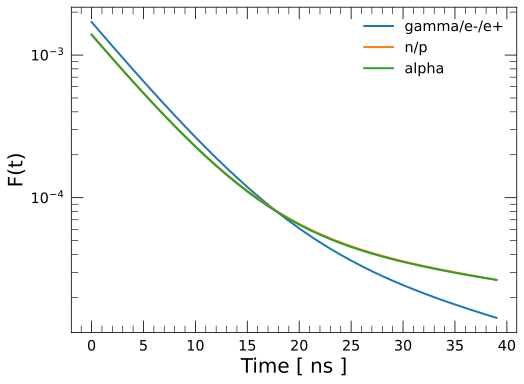

In [16]:
# For presenting different particle's difference
v_particles_present = ["gamma/e-/e+", "n/p", "alpha"]
for i, particle in enumerate(v_particles_present):
    dE_dx = v_dE_dx_to_plot[i]
    dir_time_constant_certain_dE_dx = {}
    for time_constant,f in dir_interp_f.items():
        dir_time_constant_certain_dE_dx[time_constant] = f(dE_dx)
    plt.plot(v_time_plot,f_photon_emission_time(dir_time_constant_certain_dE_dx, v_time_plot),
             label=f"{particle}", linewidth=2)
# label=f"{particle}--dE/dx={dE_dx:.2f} MeV/mm", linewidth=2)
    plt.semilogy()
    # plt.title("$$")
    plt.xlabel("Time [ ns ]")
    plt.legend()
    plt.ylabel("F(t)")
    plt.savefig("./figure/diff_particle_time_shape_original_constant.png")
    



In [17]:
v_particles = [ "Cs137", "Ge68", "C14", "K40", "Mn54", "Co60", "Fe55", "PuC"]
# v_particles = [ "Cs137"]
                # "AmC"]
# v_particles = [  "Ge68" ]
# v_particles = [ "Cs137"]

v_name_files = ["user-detsim-_no_optical.root"]*len(v_particles)
v_neutron_filter = [False]*len(v_particles)
template_path = \
    "/afs/ihep.ac.cn/users/l/luoxj/timing_constant_study/calibration_for_dE_dx/{}/dE_dx_result.npz"
check_result_with_track = False
dir_v_dE_dx_average = {}
dir_v_equen = {}
dir_v_dE_dx_average_with_quench = {}

for particle in v_particles:
    name_file_particle = particle
    if particle == "Fe55":
        name_file_particle = "gamma_Fe55"
    with np.load(template_path.format(name_file_particle), allow_pickle=True) as f:
        dir_v_dE_dx_average[particle] =  f["dir_events"].item()["dE_dx_average"]
        dir_v_equen[particle] = f["dir_events"].item()["equen"]
        dir_v_dE_dx_average_with_quench[particle] = f["dir_events"].item()["dE_dx_average_with_quench"]



{'Cs137': 1.0006762146949768, 'Ge68': 1.1981937885284424, 'C14': 1.1719264, 'K40': 0.5956730246543884, 'Mn54': 0.8314725, 'Co60': 0.64352155, 'Fe55': 6.4172845, 'PuC': 0.42118677496910095}


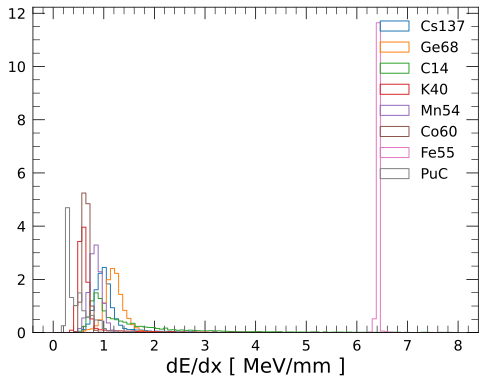

In [18]:
x_max = 8
dir_mean_values = {}
equen_threshold_PuC = 8
for particle in dir_v_dE_dx_average_with_quench.keys():
# for particle in ["PuC"]:
    if particle == "PuC":
        plt.hist(dir_v_dE_dx_average_with_quench[particle][dir_v_equen[particle]>equen_threshold_PuC], bins=np.linspace(0,x_max,100),
             label=particle,histtype="step", density=True)
        dir_mean_values[particle] = np.median(dir_v_dE_dx_average_with_quench[particle][dir_v_equen[particle]>equen_threshold_PuC])
    else:
        plt.hist(dir_v_dE_dx_average_with_quench[particle], bins=np.linspace(0,x_max,100),
             label=particle,histtype="step", density=True)
        dir_mean_values[particle] = np.median(dir_v_dE_dx_average_with_quench[particle])
plt.legend()
plt.xlabel("dE/dx [ MeV/mm ]")

print(dir_mean_values)

{'Co60': [7.990000000000001e-07, 4.93, 1.7100000000000004e-07, 20.6, 3e-08, 190], 'AmC': [6.500000000000001e-07, 4.93, 2.31e-07, 34, 1.1900000000000002e-07, 220], 'alpha': [6.500000000000001e-07, 4.93, 2.2800000000000006e-07, 35, 1.22e-07, 220]}


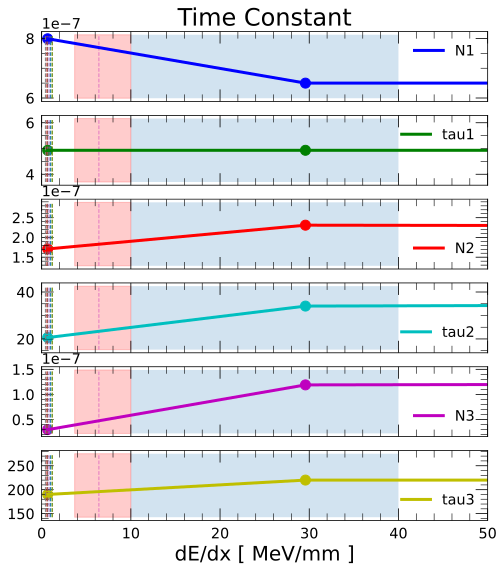

In [22]:
# Normalization of parameters N*
for particle in dir_v_timing_constant.keys():
    for i in range(len(v_name_timing_constant)):
        if "N" in v_name_timing_constant[i]:
            dir_v_timing_constant[particle][i] = dir_v_timing_constant[particle][i]*0.01
print(dir_v_timing_constant)


n_figures = len(v_name_timing_constant)
fig,axs = plt.subplots(6,1,sharex="col",figsize=(8,9))
colors = ["b","g","r","c","m","y","k","w"]
dir_v_x = {}
dir_v_y = {}
v_y_for_calib = [0,100]
for i_constant in range(6):
    # plt.figure()
    # ax = plt.subplot(n_figures*100+10+1+i_constant)
    v_x = []
    v_y = []
    for particle in dir_v_timing_constant.keys():
        v_x.append(dir_mean_dE_dx_with_quench[particle])
        v_y.append(dir_v_timing_constant[particle][i_constant])
    # plt.plot(v_x,v_y)
    for particle in dir_mean_values.keys():
        axs[i_constant].plot([dir_mean_values[particle]]*2, [v_y[0]*0.75,v_y[1]*1.25], ls="--",
                             linewidth=1)
    axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=v_name_timing_constant[i_constant])
    axs[i_constant].legend()
    axs[i_constant].fill_between([10, 40], [v_y[0]*0.75]*2, [v_y[1]*1.25]*2, alpha=.2, label="Neutron ( 9MeV )")
    axs[i_constant].fill_between([3.7, 10], [v_y[0]*0.75]*2, [v_y[1]*1.25]*2, alpha=.2, label="Neutron ( 9MeV )",
                                 color="r")
    axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    dir_v_x[v_name_timing_constant[i_constant]] = v_x
    dir_v_y[v_name_timing_constant[i_constant]] = v_y
    # ax.title(v_name_timing_constant[i_constant])
    axs[i_constant].set_xlim(0,50)
plt.xlabel("dE/dx [ MeV/mm ]")
axs[0].set_title("Time Constant")

plt.savefig("./figure/time_constant_with_dE_dx_added_calibration.png")


In [20]:
print("hello")

hello
